# 00. Table of Content

### 01. Importing Libraries & Dataframes
### 02. Security Implications
### 03. Customer Behaviour in different Geographic Areas
### 04. Exclude low-activity Customers from further Analysis

# 01. Importing Libraries & Dataframes

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path
path = r'C:\Users\krist\22.01.2024 Instacart Basket Analysis'

In [4]:
# Import last dataframe
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 02. Security Implications 

In [5]:
ords_prods_all.dtypes

order_id                           object
user_id                            object
order_number                        int64
order_day_of_week                   int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                         object
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                           object
department_id                      object
prices                            float64
busiest_day                        object
busiest_days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
mean_product_price                float64
spending_flag                      object
median_days_since_prior_order     float64
order_frequency_flag               object
first_name                         object
last_name                         

In [6]:
# data contains personally identifiable information (PII) in the form of 'name' in combination with 'age'. 
# Accordingly it needs to be confirmed that the storage, usage and sharing of data is GDPR compliant.
# In case it is not and since the info is not relevant to the final analysis - I'll drop the name columns from the data frame before performing the rest of the analysis.
ords_prods_all = ords_prods_all.drop(columns=['first_name','last_name'])

In [7]:
# Check new dataframe
ords_prods_all.dtypes

order_id                           object
user_id                            object
order_number                        int64
order_day_of_week                   int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                         object
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                           object
department_id                      object
prices                            float64
busiest_day                        object
busiest_days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
mean_product_price                float64
spending_flag                      object
median_days_since_prior_order     float64
order_frequency_flag               object
gender                             object
state                             

# 03. Customer Behaviour in different Geographic Areas

## Create regional segmentation of data

In [8]:
# List states
ords_prods_all['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [9]:
# Create 'region' column and populate with states. Start with 'Northeast'
ords_prods_all.loc[ords_prods_all['state'].isin(['Maine','New Hampshire','Vermont', 'Massachusetts', 'Rhode Island','Connecticut','New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [10]:
# Check values 'Northeast' --> 9
ords_prods_all.loc[ords_prods_all['region'] == 'Northeast', ['state', 'region']].value_counts()

state          region   
Pennsylvania   Northeast    667082
Rhode Island   Northeast    656913
Massachusetts  Northeast    646358
Maine          Northeast    638583
New York       Northeast    635983
New Jersey     Northeast    627692
Connecticut    Northeast    623022
New Hampshire  Northeast    615378
Vermont        Northeast    611725
Name: count, dtype: int64

In [11]:
# Create 'region' column and populate with states. Region is 'Midwest'
ords_prods_all.loc[ords_prods_all['state'].isin(['Wisconsin','Michigan','Illinois', 'Indiana', 'Ohio','North Dakota','South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [12]:
# Check values 'Midwest' --> 12
ords_prods_all.loc[ords_prods_all['region'] == 'Midwest', ['state', 'region']].value_counts()

state         region 
Minnesota     Midwest    647825
Missouri      Midwest    640732
North Dakota  Midwest    638491
Kansas        Midwest    637538
South Dakota  Midwest    633772
Illinois      Midwest    633024
Michigan      Midwest    630928
Ohio          Midwest    628319
Wisconsin     Midwest    628108
Indiana       Midwest    627282
Nebraska      Midwest    625813
Iowa          Midwest    625493
Name: count, dtype: int64

In [13]:
# Create 'region' column and populate with states. Region is South
ords_prods_all.loc[ords_prods_all['state'].isin(['Delaware','Maryland','District of Columbia', 'Virginia', 'West Virginia','North Carolina','South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [14]:
# Check values 'South' --> 17
ords_prods_all.loc[ords_prods_all['region'] == 'South', ['state', 'region']].value_counts()

state                 region
Georgia               South     656389
North Carolina        South     651900
Oklahoma              South     651739
Virginia              South     641421
Texas                 South     640394
Alabama               South     638003
Louisiana             South     637482
Delaware              South     637024
South Carolina        South     636754
Arkansas              South     636144
Mississippi           South     632675
Kentucky              South     632490
Florida               South     629027
Maryland              South     626579
Tennessee             South     617873
District of Columbia  South     613695
West Virginia         South     612296
Name: count, dtype: int64

In [15]:
# Create 'region' column and populate with states. Region is West
ords_prods_all.loc[ords_prods_all['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah','Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [16]:
# Check values 'West' --> 13
ords_prods_all.loc[ords_prods_all['region'] == 'West', ['state', 'region']].value_counts()

state       region
California  West      659783
New Mexico  West      654494
Arizona     West      653964
Alaska      West      648495
Wyoming     West      644255
Colorado    West      639280
Oregon      West      636425
Nevada      West      636139
Montana     West      635265
Hawaii      West      632901
Washington  West      632852
Utah        West      611941
Idaho       West      607119
Name: count, dtype: int64

In [17]:
# Check for missing regions
ords_prods_all.loc[ords_prods_all['region'] == 'nan', ['state', 'region']].value_counts()

Series([], Name: count, dtype: int64)

## Question: Is there a difference in spending habits between the different US regions?

In [18]:
# create crosstab for region and spending flag
crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [19]:
# Check crosstab
crosstab

spending_flag,high spender,low spender
region,,
Midwest,29007,7568318
Northeast,18600,5704136
South,40412,10751473
West,31106,8261807


In [20]:
# Calculate percentage of high spenders
crosstab['percentage_high_spender'] = crosstab['high spender'] / (crosstab['high spender'] + crosstab['low spender']) * 100


In [21]:
# Check extra column
crosstab

spending_flag,high spender,low spender,percentage_high_spender
region,,,
Midwest,29007,7568318,0.381805
Northeast,18600,5704136,0.325019
South,40412,10751473,0.374467
West,31106,8261807,0.375091


In [22]:
# Copy table to excel
crosstab.to_clipboard()

#### Answer: While the South has the most high spending customers in terms of count with >40K, the Midwest has the highest percentage of high spenders among the total Midwest customer base with 0.38%. The Northeast has both the lowest count and lowest percentage of high spenders among all 4 regions.

In [23]:
# Drop extra column for visual
crosstab = crosstab.drop(columns=['percentage_high_spender'])

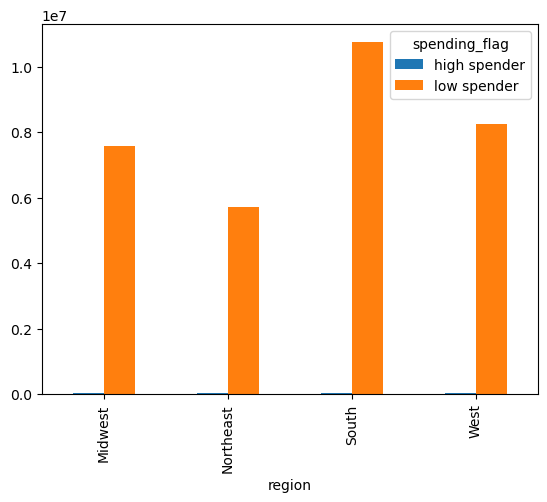

In [24]:
# Create Bar Chart on crosstab
Spending_per_region = crosstab.plot.bar()

In [25]:
# Set axis labels & title
Spending_per_region.set_xlabel("region")
Spending_per_region.set_ylabel("number of orders")
Spending_per_region.set_title("Spender distribution per US region")

Text(0.5, 1.0, 'Spender distribution per US region')

In [26]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [39]:
# Export bar chart as image file
Spending_per_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_9.png'),bbox_inches = 'tight')

# 04. Exclude low-activity customers from further analysis

In [28]:
# Check dataframe
ords_prods_all.loc[ords_prods_all['user_id'] == '1', ['user_id','order_number','max_order']].head(15)

,user_id,order_number,max_order
0,1,1,10
1,1,2,10
2,1,3,10
3,1,4,10
4,1,5,10
5,1,6,10
6,1,7,10
7,1,8,10
8,1,9,10
9,1,10,10


In [29]:
# Create exclusion flag for customers with less than 5 orders
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'customer_activity'] = 'low-activity'

In [30]:
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'customer_activity'] = 'high-activity'

In [31]:
# Check new column 'customer_activity'
ords_prods_all[['user_id','max_order','customer_activity']].head()

,user_id,max_order,customer_activity
0,1,10,high-activity
1,1,10,high-activity
2,1,10,high-activity
3,1,10,high-activity
4,1,10,high-activity


In [32]:
# Check via value count
ords_prods_all['customer_activity'].value_counts(dropna = False)

customer_activity
high-activity    30964564
low-activity      1440295
Name: count, dtype: int64

In [33]:
# Create sample with high-activity customers only
ords_prods_high_activity = ords_prods_all.loc[ords_prods_all['customer_activity'] == 'high-activity']

In [34]:
# Check new dataframe
ords_prods_high_activity.shape

(30964564, 33)

In [35]:
ords_prods_high_activity.dtypes

order_id                           object
user_id                            object
order_number                        int64
order_day_of_week                   int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                         object
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                           object
department_id                      object
prices                            float64
busiest_day                        object
busiest_days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
mean_product_price                float64
spending_flag                      object
median_days_since_prior_order     float64
order_frequency_flag               object
gender                             object
state                             

In [36]:
# Export ords_prods_high_activity to pkl
ords_prods_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))